In [1]:
!pip install koco
!pip install emoji
!pip install soynlp
!pip install transformer

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for koco: filename=koco-0.2.3-py3-none-any.whl size=7341 sha256=6444e9c34c9c2f2ec42724134aeefea9ffd742bc0900e77d48c3f5d8ed14e7e9
  Stored in directory: /root/.cache/pip/wheels/70/44/29/b42b7918973f852a75893ce84c9f84f286842546ae44ed9561
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=78a451d3b9eef07b0529a3d82f9549166afb31bd0415464123a2d00485da3ae6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built koco wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.8 MB/s eta 0:00:00a 0:00:01
ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [2]:
import koco
import pandas as pd

In [3]:
# 2. beep download

train_dev = koco.load_dataset('korean-hate-speech', mode='train_dev')
test_dev = koco.load_dataset('korean-hate-speech', mode='test')

In [4]:
beep_df_one = pd.DataFrame(train_dev['train'])
beep_df_two = pd.DataFrame(train_dev['dev'])
beep_df = pd.concat([beep_df_one,beep_df_two], ignore_index=True)

beep_df.to_excel('./beep.xlsx',index=False)
beep_df.sample(10)

,comments,contain_gender_bias,bias,hate,news_title
1348,나는 진짜 이런기사에 열폭하는 애들보면 이해가 안간다.유명인 자녀들은 다 빛과 그림...,False,none,none,"""[공식입장] 이경규 딸 이예림, 본격 배우 활동 시작…박보영과 한솥밥"""
6921,지아 송종국이랑 붕어빵 처럼 닮아 인물 좋네 예쁜거 보니 연예인 해도 되긋네 지 못...,True,gender,hate,"""송종국, 딸 지아와 운동 삼매경 '붕어빵 부녀'"""
3122,부성이란걸 못느껴봐서 저러나 안타깝다,False,others,none,"""""""논란에도 LOVE"""" 성룡 딸, 연상 여친과 다정한 커플샷 [룩@차이나]"""
1592,"남편은 잘못했고 법의 심판을 받아야하지만, 그렇다고 이혼을? 진심 부부라면 죄값을 ...",False,others,offensive,"""""""행복한 엄마 미소""""..김나영, 두 아이와 여유로운 일상"""
223,ㅋㅋㅋ 강다니엘 빠순이들 많네~ 뭔가있었겠지.있었으니까 저난리피웠겠지.맹목적으로만 ...,True,gender,hate,육지담 “강다니엘과 사귄 것 맞다” 재차 언급
4797,여행은 꿈도 못꾸는 사람들도 있습니다 네이버와 기자님들의 생각과 배려가 아쉽네요 좋...,False,others,none,"""이동국♥이수진, 하와이 여행 중 백허그 '설아-수아-시안은 산타와'"""
3222,뽕쟁이 몰골 ㄷㄷ,False,others,hate,"""'나혼자산다' 쌈디 """"식욕+수면욕+성욕까지 없어졌다"""""""
8229,헌법에 있는 권리다. 항소를 했다고 뭐라고 하는 뭐냐!!! 왜 이렇게 법과 절차를 ...,False,others,offensive,"""'빚투' 마이크로닷 부모, 징역형에 불복…판결 이틀 만에 항소장 제출[종합]"""
494,결국 세계가 인정하는 건 일베 나부랭이가 아니라 봉준호 송강호 김연아 방탄소년단. ...,False,others,offensive,"""문재인 대통령, 20일 봉준호 감독 청와대 초청 '축하+격려'[공식]"""
5037,옌 또 뭐야 ?!,False,none,offensive,"""'예비 품절남' 김진우, 3살 연하 승무원 열애 ing→올 가을 결혼 [종합]"""


In [5]:
def beep2df(df):
    beep_df = df

    beep_sex_discrimination_series = beep_df[
        (beep_df['contain_gender_bias'] ==  True) & (beep_df['hate'].isin(['hate', 'offensive']))
    ]['comments']
    common_speach_beep_seires = beep_df[beep_df['hate']=='none']['comments']


    sex_beep_df = pd.DataFrame(beep_sex_discrimination_series, columns=["comments"])
    common_beep_df = pd.DataFrame(common_speach_beep_seires, columns=["comments"])


    class_list_sex = [[1] for _ in range(len(sex_beep_df))]
    class_list_common = [[0] for _ in range(len(common_beep_df))]


    sex_beep_df["class"] = class_list_sex
    common_beep_df["class"] = class_list_common

    sex_beep_df.rename(columns={'comments': 'text'}, inplace=True)
    common_beep_df.rename(columns={'comments': 'text'}, inplace=True)

    labeled_beep_df = pd.concat([sex_beep_df, common_beep_df], ignore_index=True)
    labeled_beep_df['class'] = labeled_beep_df['class'].apply(lambda x: x[0])
    
    return labeled_beep_df

In [8]:
print(len(beep_df))
beep_df = beep2df(beep_df)
beep_df.sample(10)

8367


,text,class
2856,신선해서 좋았음~!!!,0
3616,윤민수랑 결혼 ㄱ ㄱ,0
2256,맴버좀 싹 바꿔라 이제 ㅡㅡ,0
1908,낸시랑씨가 건강하게 살아가길 바래요,0
823,요새는 사극 마저도 못생긴 돼지년 노처녀들이 처보는 김차드라마 ㄷㄷ,1
20,40세 이상 한녀들은 임신도 못하는 사실상 쓸모없는 분리수거 대상,1
3596,유지보단 안해준단거죠 유책배우자가 좋아서 글겠습니까 이혼해줌 돌씽이라고 지만 신나서...,0
903,이쉐기덜 아주 나쁜놈들입니다.. 먹엇으면 지들만먹고 촬영해서 지들만보면 답니까?! ...,1
2286,모를수잇음 카톡같은데 결혼해도 티안내고 그럼 모름.내가 겪어봄,0
1979,누나 아프지마 ㅜㅜ,0


In [9]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

def text_preprocess(text):
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
 
    text = pattern.sub(' ', text)
    text = emoji.replace_emoji(text, replace='') #emoji 삭제
    text = url_pattern.sub('', text)
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)
    
    return text

beep_df['text'] = beep_df['text'].apply(lambda x: text_preprocess(x))
beep_df.head(10)

,text,class
0,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,1
1,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",1
2,180이하 호빗 한남들은 결혼 하지마셈 ㅋ 돈없으면 연애도 하지마셈 ㅋ 니들 호빗 ...,1
3,"2,30대 골빈여자들은 이 기사에 다 모이는건가ㅋㅋ 이래서 여자는 투표권 주면 안된...",1
4,20대 30대 남자 비율보소 ㅋㅋ할짓 드럽게없나봐... 죽자고 덤벼드는거봐ㅠㅠ,1
5,25년전이면 한참 팔팔할때.. 오달수도 아마 이십대 초반.. 서로 어렸을때 반콩깠던...,1
6,2~30대녀 :(쿵쾅쿵쾅) 꿀꿀꿀!!!!!!,1
7,2차로 남자집을 왜 가.무조건 남자만 탓 할 일은 아니다.명백히 가려지길...,1
8,30대 아줌마들 남에 집에 감놔라배놔라 ㅋㅋ,1
9,30대 아줌마들;; 고만들 하세요;,1


In [10]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "beomi/KcELECTRA-small-v2022"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, output_hidden_states=True)

# set device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-small-v2022 and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [11]:
batch_size =  32
learning_rate =  5e-5
num_epochs = 10
num_training_steps = 5000

In [12]:
from torch.utils.data import DataLoader, Dataset

# Custom Dataset 클래스
class MyDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]
        return text, label

my_dataset = MyDataset(beep_df)
train_dataloader = DataLoader(my_dataset, shuffle=True, batch_size=batch_size)

In [13]:
from torch.optim import AdamW
from transformers import get_scheduler

optimizer = AdamW(model.parameters(), lr=learning_rate)

num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [14]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    print(epoch)
    for texts, labels in train_dataloader:
        # make inputs
        inputs = tokenizer(texts, padding=True, return_tensors='pt')
        inputs['labels'] = torch.tensor(labels)
        
        inputs = {k: v.to(device) for k,v in inputs.items()}
        
        
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/1520 [00:00<?, ?it/s]

0


/tmp/ipykernel_26/950733730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs['labels'] = torch.tensor(labels)
/tmp/ipykernel_26/950733730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs['labels'] = torch.tensor(labels)


1
2
3
4
5
6
7
8
9


In [15]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

model= model.to(device)
model.eval()

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [16]:
# 임베딩을 저장할 리스트 초기화
embeddings = []

train_dataloader = DataLoader(my_dataset, shuffle=False, batch_size=batch_size)
# 데이터 로더를 통해 배치 단위로 처리
for texts, labgel in train_dataloader:
    inputs = tokenizer(texts, padding=True, return_tensors='pt')
    inputs = {k: v.to(device) for k,v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        cls_hidden_state = outputs.hidden_states[-1].cpu()
        mean_embedding = torch.mean(cls_hidden_state,dim=1).squeeze()
        embeddings.extend(mean_embedding)

In [18]:
my_df = pd.DataFrame({
  "sentence" : embeddings,
  "label": beep_df['class']
})
my_df.head()

,sentence,label
0,"[tensor(0.4101), tensor(0.2667), tensor(-0.418...",1
1,"[tensor(0.3829), tensor(0.2101), tensor(-0.424...",1
2,"[tensor(0.3311), tensor(0.2540), tensor(-0.474...",1
3,"[tensor(0.2900), tensor(0.2365), tensor(-0.454...",1
4,"[tensor(0.3764), tensor(0.2486), tensor(-0.405...",1


In [19]:
import numpy as np
size = len(my_df)
matrix = np.zeros((size, 256))

for idx, vectors in enumerate(my_df['sentence']):
    vector = np.array(vectors)
    matrix[idx] =vector 

class_list = my_df['label']

In [20]:
import re
import emoji
import numpy as np 
import pandas as  pd
import seaborn as sns
import sys, re, argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc

def visulize_sentences(title ,matrix, class_list, class_dict=None):
    
    vectors = matrix # 여기에 100차원 벡터 데이터를 입력하세요
    classes = class_list # 여기에 해당 벡터의 클래스 라벨(0에서 10 사이의 값)을 입력하세요
    
    if class_dict is not None:
        for idx, tmp_class in enumerate(classes):
            classes[idx] = class_dict[tmp_class]
        
    class_kind = len(set(classes))
    # t-SNE 임베딩 수행
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    vectors_tsne = tsne.fit_transform(vectors)

    # 시각화
    plt.figure(figsize=(20, 10))
    sns.scatterplot(
        x=vectors_tsne[:, 0], y=vectors_tsne[:, 1],
        hue=classes,
        palette=sns.color_palette("hsv", class_kind),
        legend="full",
        alpha=0.7
    )

    plt.title(title)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4862 samples in 0.001s...
[t-SNE] Computed neighbors for 4862 samples in 0.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4862
[t-SNE] Computed conditional probabilities for sample 2000 / 4862
[t-SNE] Computed conditional probabilities for sample 3000 / 4862
[t-SNE] Computed conditional probabilities for sample 4000 / 4862
[t-SNE] Computed conditional probabilities for sample 4862 / 4862
[t-SNE] Mean sigma: 0.266125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.678108
[t-SNE] KL divergence after 300 iterations: 2.094919


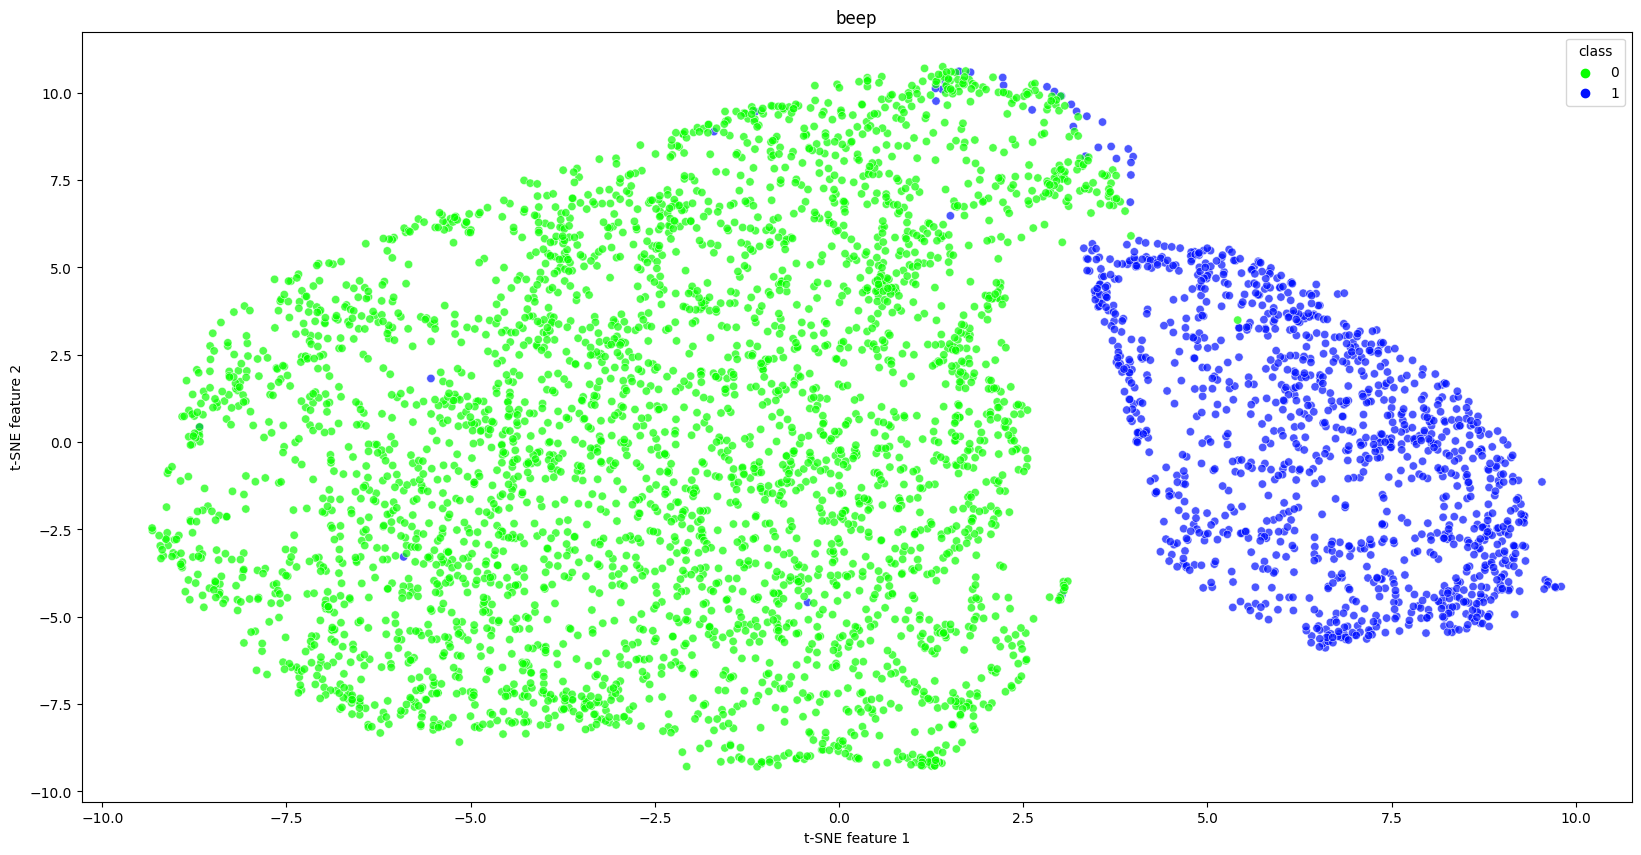

In [22]:
class_list = beep_df['class']
visulize_sentences("beep",matrix, class_list)